In [1]:
import pandas as pd
from matplotlib.ticker import PercentFormatter
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

In [2]:
#Importando o dataset
df = pd.read_excel("../dataset/dry_bean_dataset.xls")

In [3]:
#Verificando o tamanho da base
df.shape

(13611, 17)

In [4]:
#Verificando os dados
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [5]:
#Conhecendo as variáveis
df.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

As colunas estão divididas em 12 dimensões, 4 classes quanto ao formato do grão e 1 classe resposta de qual categoria o grão pertence.

In [6]:
#Verificar os tipos das variáveis
df.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

A base de dados apresenta apenas uma variável categórica, representada pela classe resposta. As demais variáveis contínuas.

In [7]:
#Dados estatisticos para as variáveis númericas
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


As variáveis númericas, após análise dos valores de média e desvio padrão. Parecem não possuir valores discrepantes. Para aplicação de alguns modelos de apredizagem, será necessário realizar a normalização dos dados dentro de uma mesma escala. Como exemplo as variáveis Area e Eccentricity, que possuem em escalas diferentes.

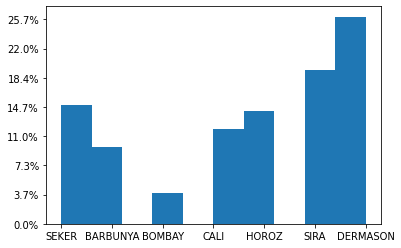

In [8]:
#Verificando a distribuição da variável resposta
plt.hist(df["Class"])
plt.gca().yaxis.set_major_formatter(PercentFormatter(13611))

In [9]:
df.Class.value_counts(normalize=True)

DERMASON    0.260525
SIRA        0.193667
SEKER       0.148924
HOROZ       0.141650
CALI        0.119756
BARBUNYA    0.097127
BOMBAY      0.038351
Name: Class, dtype: float64

Assim como apresentado no gráfico, a variável resposta está distribuída entre 7 classes. A maior distribuição está classe Dermason(26%) e a menor na classe Bombay(3,8%).

<AxesSubplot:>

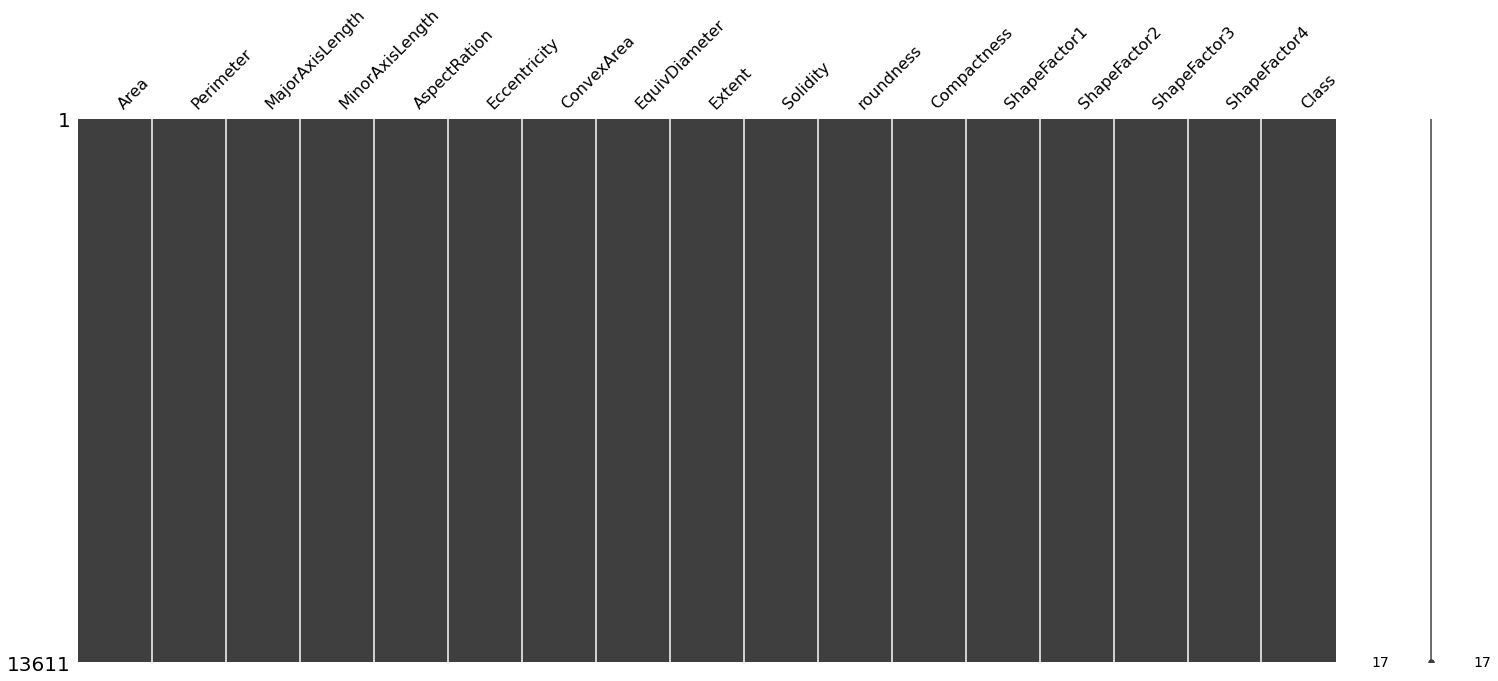

In [10]:
msno.matrix(df)

A base de dados não apresta valores nulos ou faltantes. Não será necessário realizar o complemento de dados a partir da médiana ou aplicação de modelos para descoberta de padrões para estes dados.

In [ ]:
#Plotando as variáveis contínuas
df = pd.get_dummies(df, columns=["Class"])
sns.pairplot(df, palette='coolwarm', corner=True, kind="reg", diag_kind="kde")
plt.show()

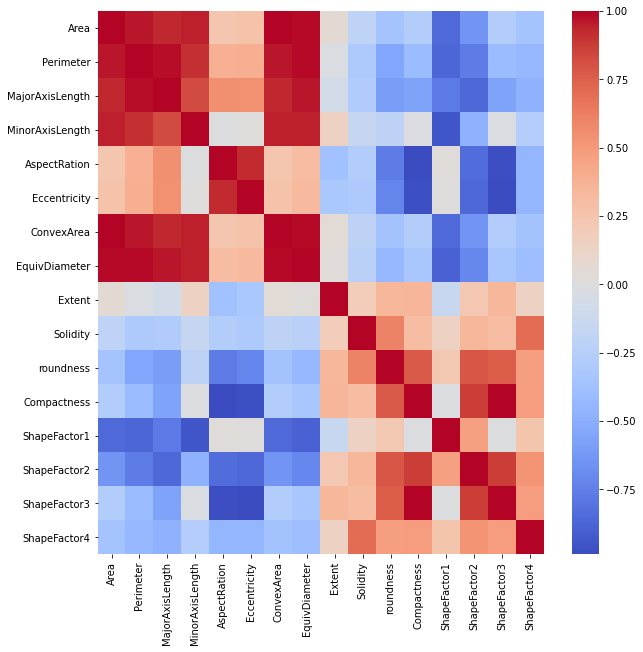

In [11]:
#Matriz de Correlação
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='coolwarm')
plt.show()

As variáveis Area, Perimeter, MajorAxisLenght, MinorAxisLength, ConvexArea e EquivDiameter possuem uma forte correlação com a variável resposta. Esta base de dados, possui variáveis com uma forte correlação com a classe reposta. Após análise estatística das variáveis, não foram encontrados valores estranhos para a média e o desvio padrão. Indicando uma baixa possibilidade de outliers. Como existem uma boa quantidade de correlação de variáveis com a classe resposta é interessante obersvar se a multicolinearidade não venha a trazer resultados enviesados para modelos pouco robustos para este problema. O principal solução a ser entregue para esta base de dados é para classificação.